In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import time

In [2]:
train= pd.read_csv("train_values.csv")
labels=pd.read_csv("train_labels.csv")
test=pd.read_csv("test_values.csv")

In [3]:
labels.drop('patient_id', axis=1, inplace=True)
df= pd.concat([train, labels], axis=1)
df.drop(['patient_id'], axis=1, inplace=True)
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


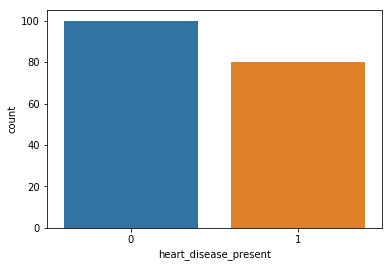

In [4]:
sns.countplot(df['heart_disease_present'])

In [5]:
df['thal']=df['thal'].map({'normal':1,'reversible_defect':2, 'fixed_defect':3 })

In [6]:
y=np.asarray(df['heart_disease_present'])
df.drop(['heart_disease_present'], axis=1, inplace=True)
x=np.asarray(df)

In [7]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=4)

In [8]:
ts= time.time()

parameter=[{'max_features':[2,3,4],
            'min_samples_leaf':[1,2]}]

RF= RandomForestClassifier(n_jobs=-1,n_estimators=100, random_state=1024,oob_score=False)

grid=GridSearchCV(RF, parameter, cv=10)

grid.fit(xtrain, ytrain)

print("Best score of Ridge: ",grid.best_score_ )

print("\nIt took",np.round((time.time()-ts)/60,3),"minutes to run." )

Best score of Ridge:  0.8541666666666666

It took 0.538 minutes to run.


C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1024, verbose=0,
            warm_start=False)

In [10]:
predict1= grid.predict_proba(xtrain)
print("\nOut-Sample logloss: ",np.round(log_loss(ytrain, predict1),4))

predict2= grid.predict_proba(xtest)
print("\nOut-Sample Logloss: ",np.round(log_loss(ytest, predict2),4))


Out-Sample logloss:  0.1175

Out-Sample Logloss:  0.4522


In [11]:
idd= test['patient_id']
test['thal']=test['thal'].map({'normal':1,'reversible_defect':2, 'fixed_defect':3 })
test.drop(['patient_id'], axis=1, inplace=True)
xx=np.asarray(test)

In [12]:
predictions= grid.predict_proba(xx)
pred= predictions[:,1]

Storing predictions in a csv file

In [13]:
data= pd.DataFrame({'patient_id':idd, 'heart_disease_present':pred})
data.to_csv("submission.csv", index=False)